In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
# Normalize (0-1 range)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
# One-hot encode labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [5]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\shubham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(X_train, Y_train, epochs=3, batch_size=64, verbose=1)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.3535 - loss: 1.7672
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5670 - loss: 1.2245
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.6224 - loss: 1.0792


In [8]:
# Prediction on random image
# ---------------------------
# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

In [9]:
idx = random.randint(0, len(X_test)-1)  # random test index
test_img = X_test[idx].reshape(1,32,32,3)

In [10]:
pred = model.predict(test_img)
predicted_label = np.argmax(pred)
true_label = np.argmax(Y_test[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


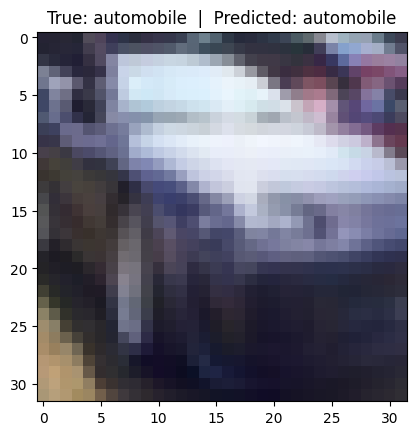

In [11]:
# Show image with prediction
plt.imshow(X_test[idx])
plt.title(f"True: {class_names[true_label]}  |  Predicted: {class_names[predicted_label]}")
plt.show()